In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

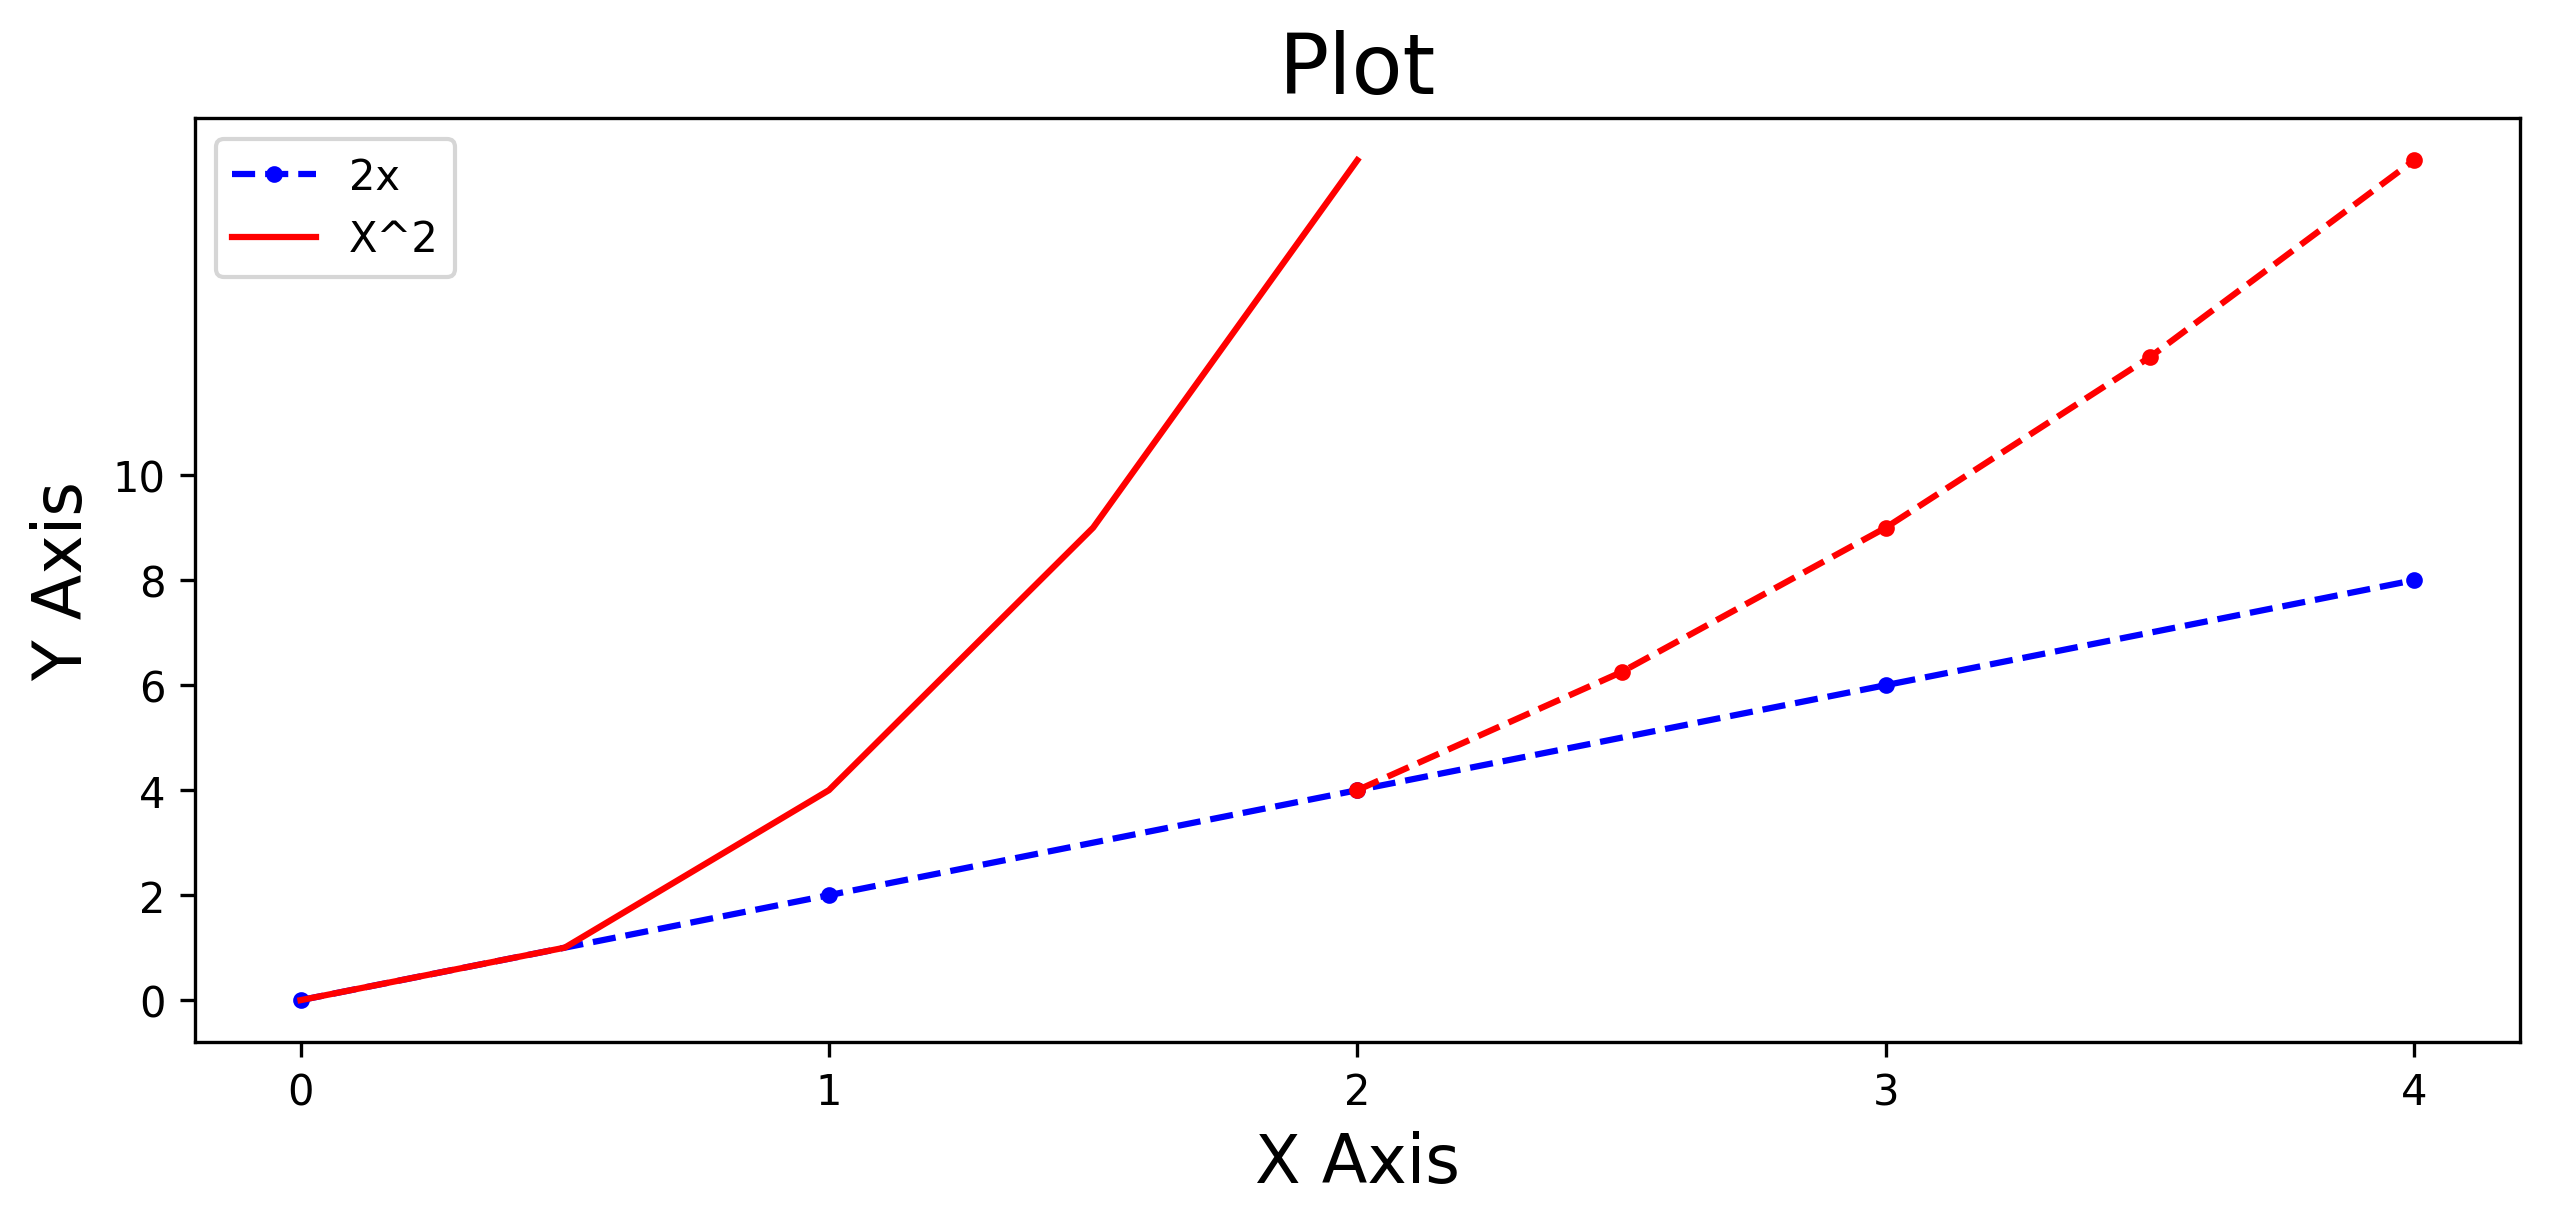

In [331]:
x = np.arange(0, 5)
y = np.arange(0, 10, 2)
# Resize the Graph
plt.figure(figsize = (10,4), dpi = 300)
# plt.plot(x,y, label = '2x', color = '#00f', linewidth = 3, linestyle = '--',
#         marker = '.', markersize = 12, markeredgecolor = '#fff' )
# shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x, y, 'b.--', label = '2x')
x2 = np.arange(0, 4.5, 0.5)
plt.plot(x2[:5], x[:5]**2, 'r', label = 'X^2')
plt.plot(x2[4:], x2[4:] ** 2, 'r.--')
plt.title('Plot', fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('X Axis', fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})
plt.ylabel('Y Axis', fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})
plt.xticks([0,1,2,3,4])
plt.yticks([0,2,4,6,8,10])
plt.legend()
# plt.savefig('graph.png', dpi = 300)
plt.show()

###  Bar Chart

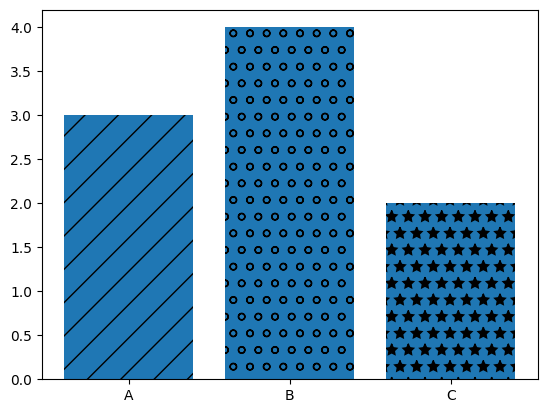

<Figure size 800x500 with 0 Axes>

In [333]:
labels = ['A', 'B', 'C']
values = [3, 4, 2]
bar_plot = plt.bar(labels, values)
# bar_plot[0].set_hatch('/')
# bar_plot[1].set_hatch('o')
# bar_plot[2].set_hatch('*')
plt.figure(figsize=(8,5))

patterns = ['/', 'o', '*']

for i in range(len(patterns)):
    bar_plot[i].set_hatch(patterns[i])

plt.show()

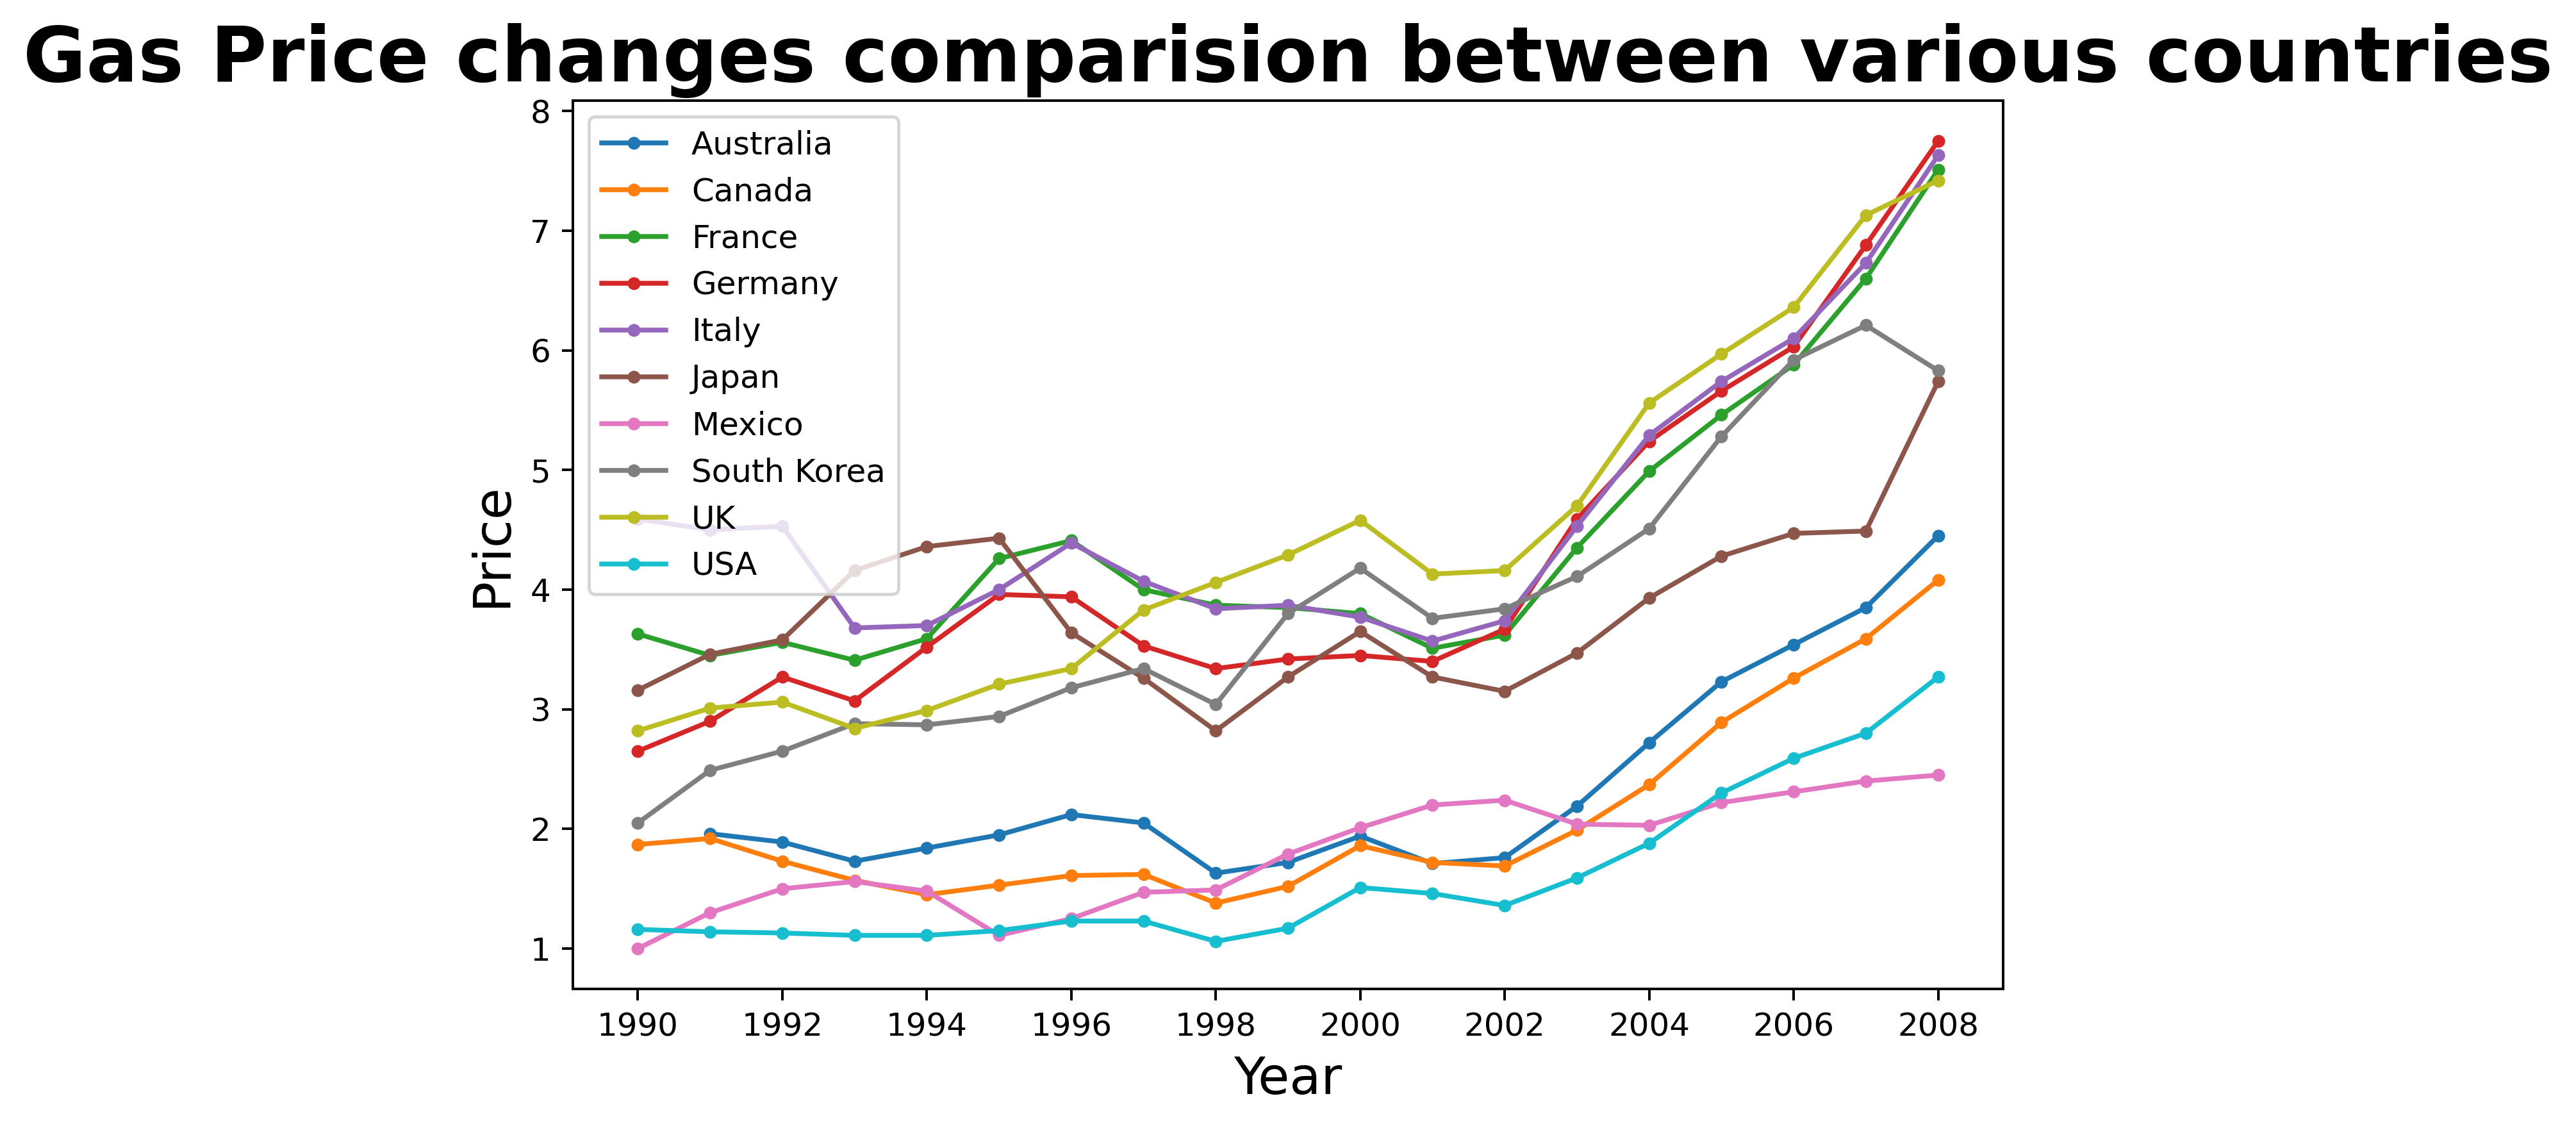

In [334]:
data = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5), dpi = 360)

# plt.plot(data['Year'], data.USA, 'r.-', label = 'USA')

# plt.plot(data.Year, data.Germany,  'g.-', label = 'Germany')

for country in data:
    if country != 'Year':
        plt.plot(data['Year'], data[country], label=country, marker = '.')
    
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Price', fontdict={'fontsize': 16})
plt.xticks(data.Year[::2])
plt.legend()

plt.title('Gas Price changes comparision between various countries',
          fontdict={'fontweight': 'bold', 'fontsize': 24})

# plt.savefig('gas_price_changes', dpi = 300)
plt.show()

In [335]:
fifa_data = pd.read_csv('fifa_data.csv')

fifa_data.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


## Histogram

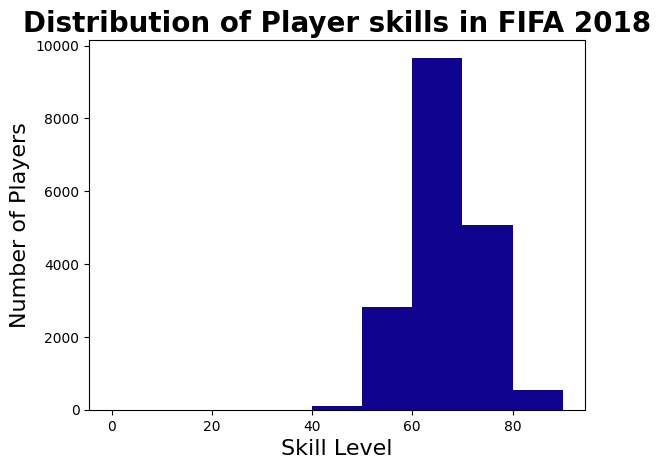

In [336]:
bins = [i for i in range(0, 100, 10)]
plt.hist(fifa_data.Overall, bins = bins, color = '#0f0390')

plt.xlabel('Skill Level', fontdict = {'fontsize': 16})
plt.ylabel('Number of Players', fontdict = {'fontsize': 16})

plt.title('Distribution of Player skills in FIFA 2018', fontdict = {'fontweight': 'bold', 'fontsize': 20})

# plt.savefig('player_skills_distribution', dpi = 300)
plt.show()

## Pie Chart

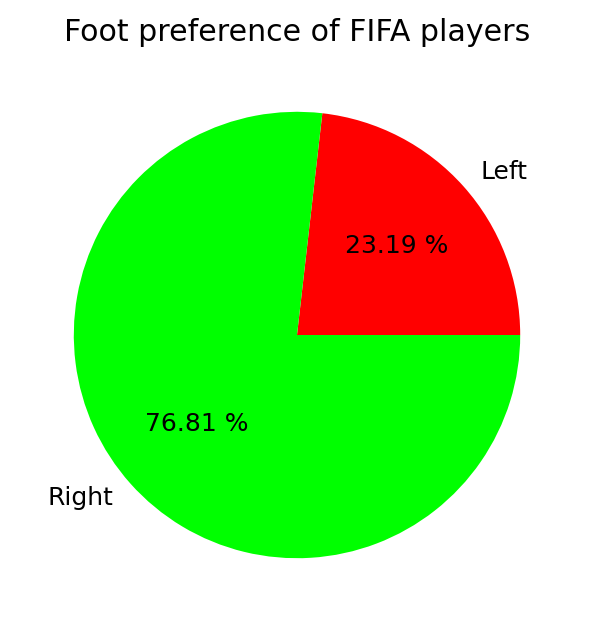

In [337]:
left = fifa_data.loc[fifa_data['Preferred Foot'] == 'Left'].count()[0]
right = fifa_data.loc[fifa_data['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']

colors = ['#f00', '#0f0']

plt.figure(figsize = (4, 5), dpi = 180)

plt.pie([left, right], labels = labels, colors = colors, autopct = '%.2f %%')

plt.title('Foot preference of FIFA players')
# plt.savefig('players_foot_preference', dpi = 300)
plt.show()

In [345]:
avg_weight = pd.Series([float(str(x).strip('lbs')) if type(x) == str else 0 for x in fifa_data.Weight]).mean()

DecimalWeights = [float(str(x).strip('lbs')) if type(x) == str else avg_weight for x in fifa_data.Weight]

fifa_data['DecimalWeights'] = pd.Series(DecimalWeights)

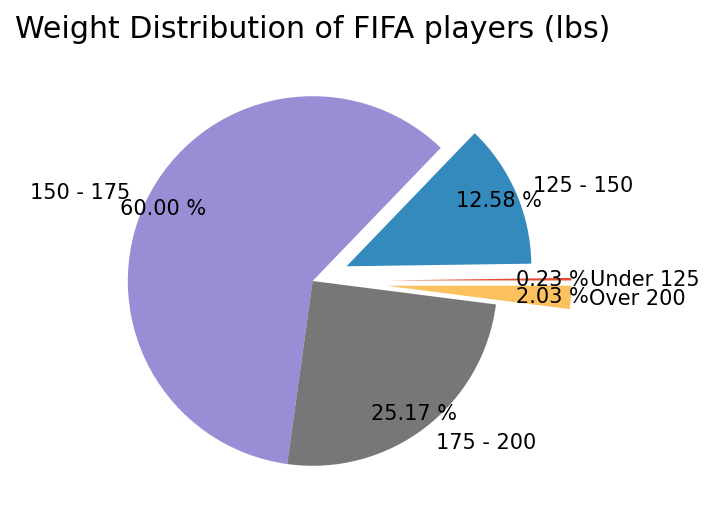

In [346]:
light = fifa_data.loc[fifa_data['DecimalWeights'] < 125].count()[0]
light_medium = fifa_data.loc[(fifa_data['DecimalWeights'] >= 125) & (fifa_data['DecimalWeights'] < 150)].count()[0]
medium = fifa_data.loc[(fifa_data['DecimalWeights'] >= 150) & (fifa_data['DecimalWeights'] < 175)].count()[0]
medium_heavy = fifa_data.loc[(fifa_data['DecimalWeights'] >= 175) & (fifa_data['DecimalWeights'] < 200)].count()[0]
heavy = fifa_data.loc[fifa_data['DecimalWeights'] >= 200].count()[0]

weights = list(map(lambda x: float(x), [light, light_medium, medium, medium_heavy, heavy]))
labels = ['Under 125', '125 - 150', '150 - 175' ,'175 - 200', 'Over 200']

plt.style.use('ggplot')
plt.figure(figsize = (6, 4), dpi = 150)

explode = (0.4, 0.2, 0, 0, 0.4)
plt.pie(weights, labels = labels, explode = explode, autopct = '%.2f %%', pctdistance = 0.9) 

plt.title('Weight Distribution of FIFA players (lbs)')
# plt.savefig('players_weight_distribution', dpi = 300)
plt.show()

## Box plot


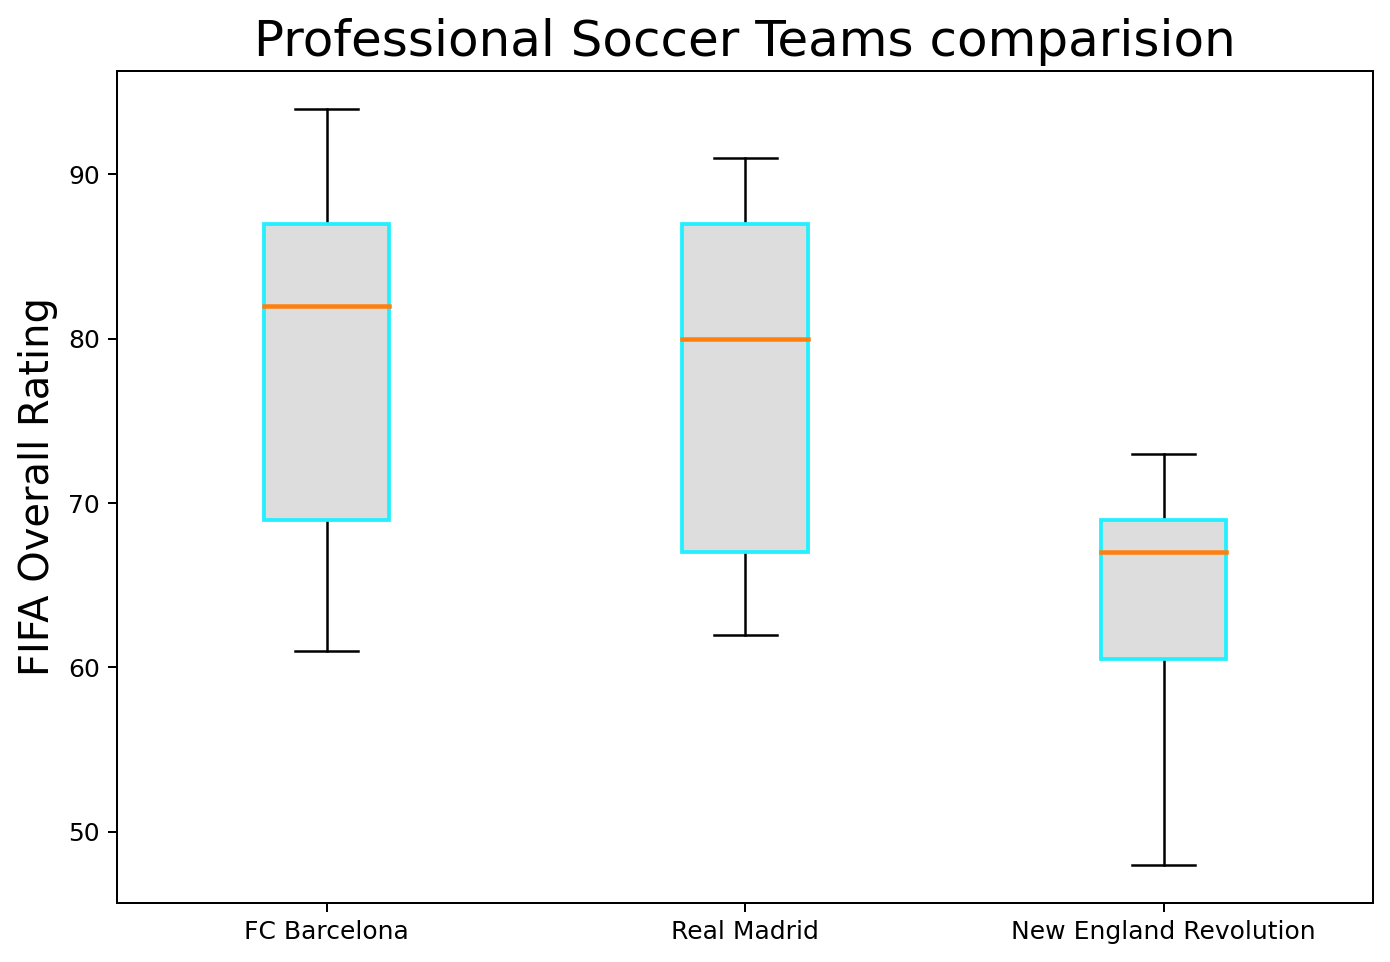

In [347]:
barcelona = fifa_data.loc[fifa_data.Club == 'FC Barcelona']['Overall']
madrid = fifa_data.loc[fifa_data.Club == 'Real Madrid']['Overall']
new_england = fifa_data.loc[fifa_data.Club == 'New England Revolution']['Overall']

plt.style.use('default')
plt.figure(figsize=(9,6), dpi = 180)

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']
boxes = plt.boxplot([barcelona, madrid, new_england], labels = labels, 
                    patch_artist = True, medianprops = {'linewidth': 1.8})

for box in boxes['boxes']:
    box.set(color = '#20f0ff', linewidth = 1.5)
    box.set(facecolor = '#ddd')

plt.title('Professional Soccer Teams comparision', fontdict = {'fontsize': 20})
plt.ylabel('FIFA Overall Rating', fontdict = {'fontsize': 16})
# plt.savefig('soccer_teams_comp', dpi = 300)
plt.show()